Data Cleaning

In [13]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv('dataset.csv')

df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x > 0 else 0 if x == 0 else np.nan)
df['Age'] = df['Age'].apply(lambda x: x if pd.isna(x) or x <= 70 else np.nan)
df['JobSatisfaction'] = df['JobSatisfaction'].apply(lambda x: x if pd.isna(x) or x <= 5 else np.nan)
df['YearsAtCompany'] = df['YearsAtCompany'].apply(lambda x: x if pd.isna(x) or (x >= 0 and x <= 50) else np.nan)

q1 = df['MonthlyIncome'].quantile(0.25)
q3 = df['MonthlyIncome'].quantile(0.75)
iqr = q3 - q1
df['MonthlyIncome'] = df['MonthlyIncome'].apply(lambda x: x if pd.isna(x) or (x >= q1-1.5*iqr and x <= q3+1.5*iqr) else np.nan)

le = LabelEncoder()
df['OverTime'] = le.fit_transform(df['OverTime'])

imputer = SimpleImputer(strategy='median')
df[['MonthlyIncome', 'Age', 'JobSatisfaction', 'YearsAtCompany']] = imputer.fit_transform(df[['MonthlyIncome', 'Age', 'JobSatisfaction', 'YearsAtCompany']])

df = df.dropna(subset=['Attrition'])

scaler = StandardScaler()
df[['MonthlyIncome', 'Age', 'YearsAtCompany']] = scaler.fit_transform(df[['MonthlyIncome', 'Age', 'YearsAtCompany']])

df.to_csv('cleaned_data.csv', index=False)

Data Visualisation


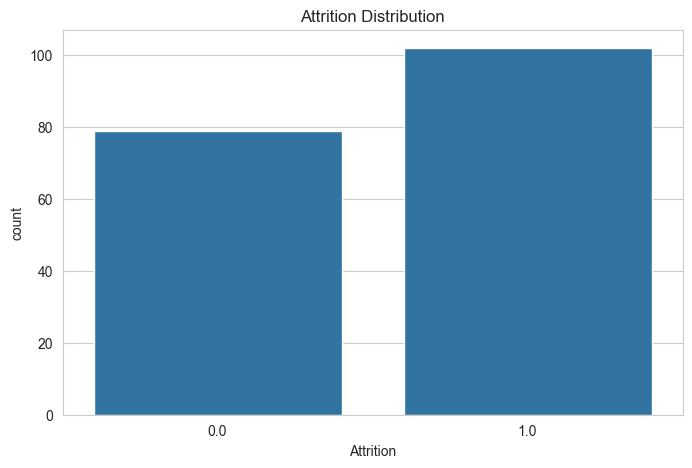

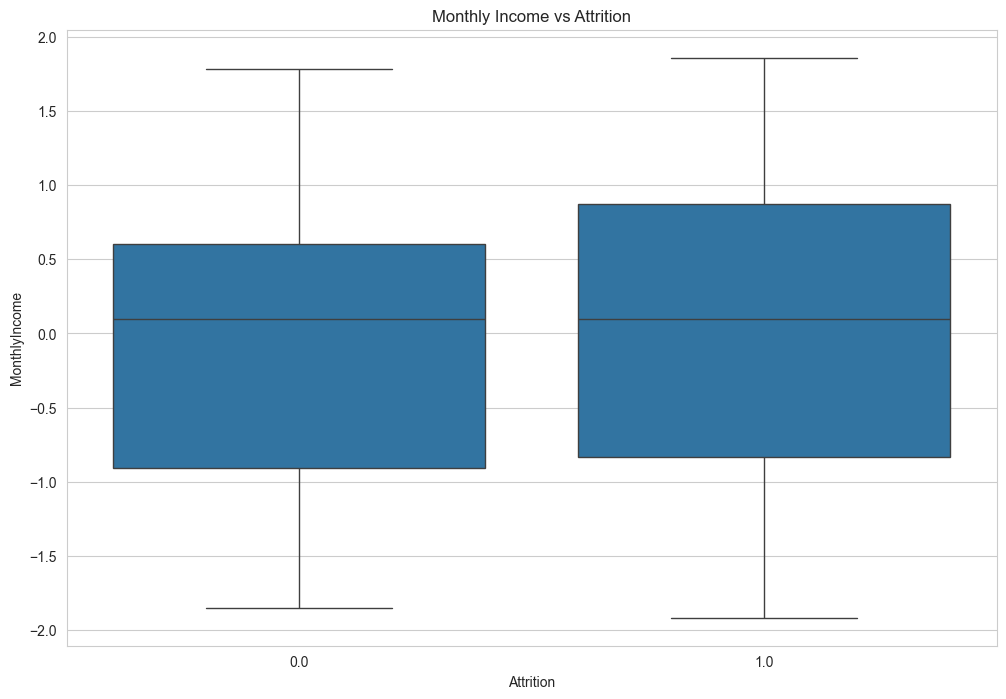

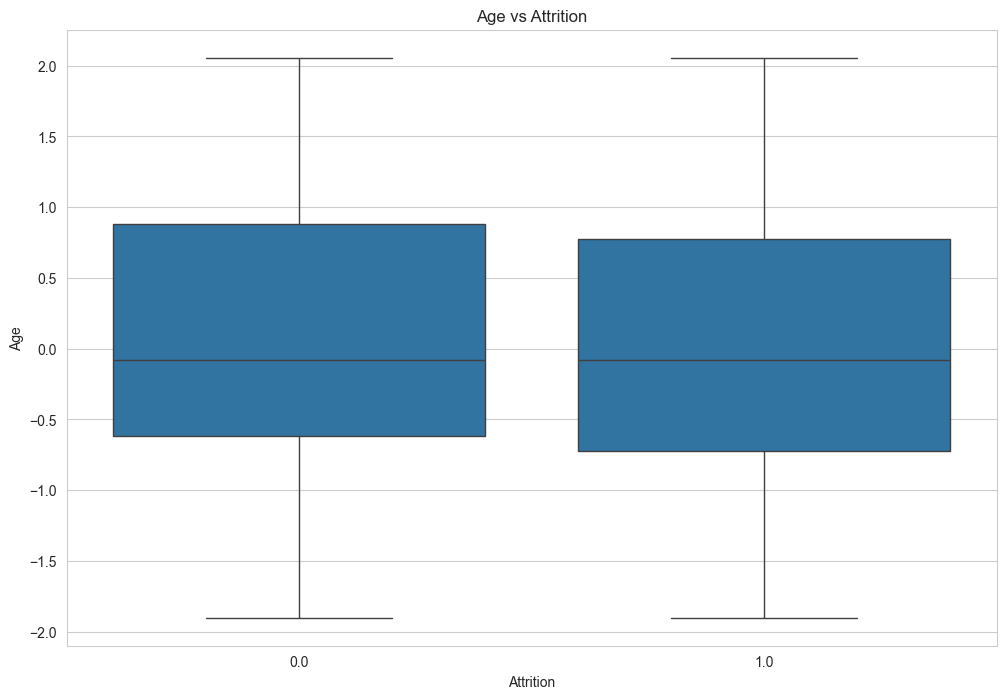

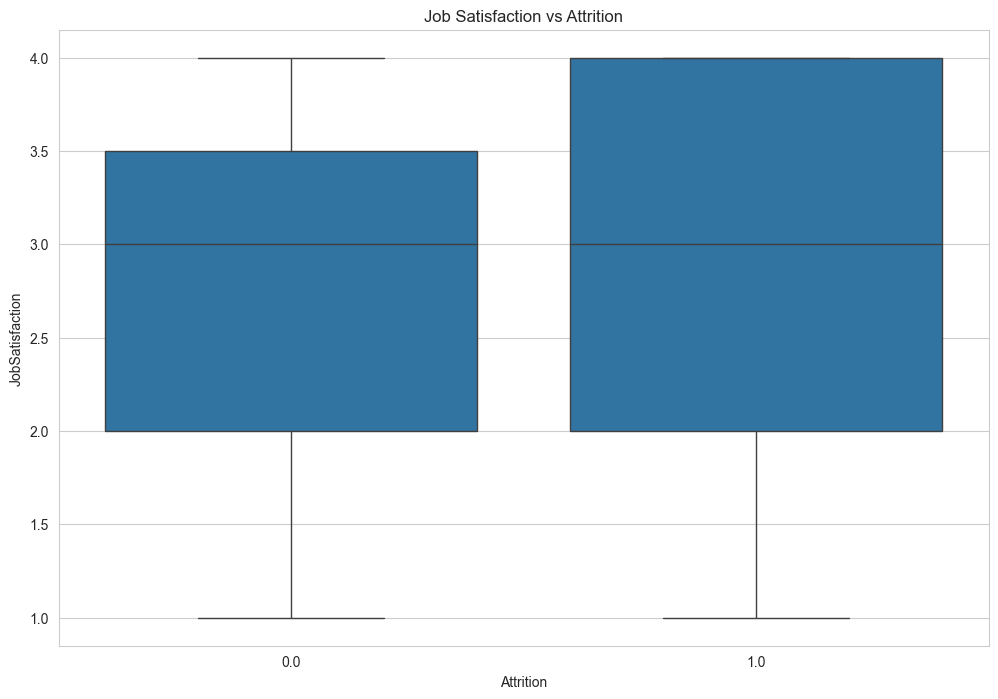

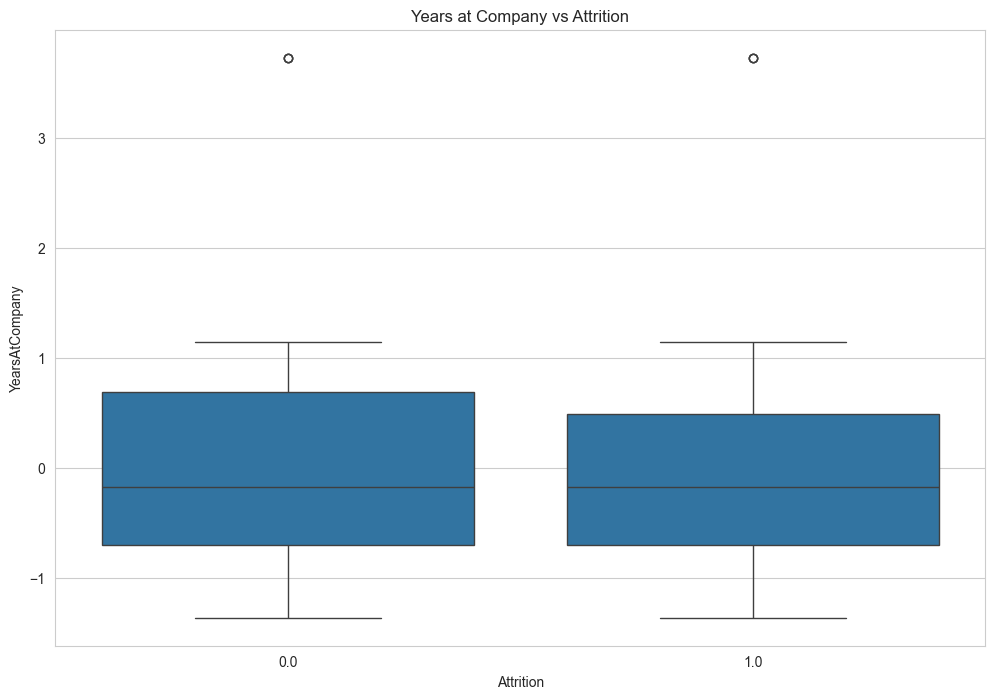

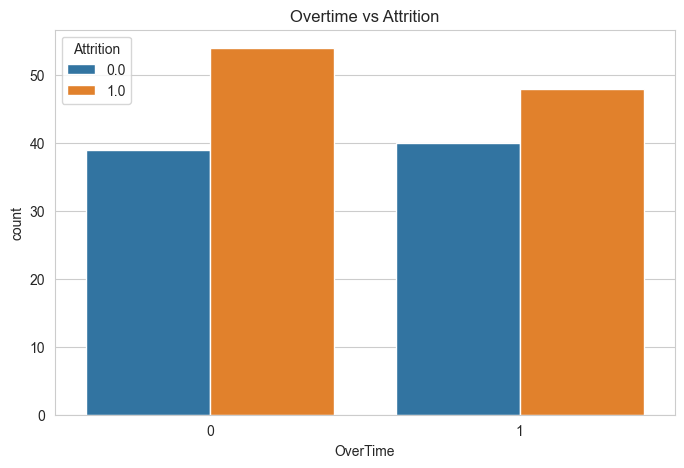

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

plt.figure(figsize=(8,5))
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Distribution')
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income vs Attrition')
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Age vs Attrition')
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df)
plt.title('Job Satisfaction vs Attrition')
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df)
plt.title('Years at Company vs Attrition')
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title('Overtime vs Attrition')
plt.show()

Logistic Regression

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = df[['MonthlyIncome', 'Age', 'JobSatisfaction', 'YearsAtCompany', 'OverTime']]
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

[[ 4 19]
 [12 20]]
              precision    recall  f1-score   support

         0.0       0.25      0.17      0.21        23
         1.0       0.51      0.62      0.56        32

    accuracy                           0.44        55
   macro avg       0.38      0.40      0.38        55
weighted avg       0.40      0.44      0.41        55

Accuracy: 0.43636363636363634


Decision Tree


In [16]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

[[11 12]
 [17 15]]
              precision    recall  f1-score   support

         0.0       0.39      0.48      0.43        23
         1.0       0.56      0.47      0.51        32

    accuracy                           0.47        55
   macro avg       0.47      0.47      0.47        55
weighted avg       0.49      0.47      0.48        55

Accuracy: 0.4727272727272727


Model Comparison

In [17]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, LogisticRegression().fit(X_train, y_train).predict(X_test)))
print("Decision Tree Accuracy:", accuracy_score(y_test, DecisionTreeClassifier().fit(X_train, y_train).predict(X_test)))

Logistic Regression Accuracy: 0.43636363636363634
Decision Tree Accuracy: 0.4909090909090909
